In [106]:
import pandas as pd
df=pd.read_csv('/content/adult.csv')

#About Dataset
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

#Fields
The dataset contains 16 columns

Target filed: Income
-- The income is divide into two classes: <=50K and >50K

Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

In [107]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [108]:
df.shape

(32561, 15)

In [109]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [111]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

There are no null values in tha datasets,

But there are some special characters(?) as visible,so we will check columns having special characters.

In [112]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [113]:
df['occupation'].value_counts()


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [114]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

#Imputation
we have to replace (?) for proper analysis.

In [115]:
df.workclass.replace('?',df['workclass'].mode()[0],inplace=True)
df.occupation.replace('?',df['occupation'].mode()[0],inplace=True)
df['native.country'].replace('?',df['native.country'].mode()[0],inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [116]:
df.groupby('income')['capital.loss'].count()

income
<=50K    24720
>50K      7841
Name: capital.loss, dtype: int64

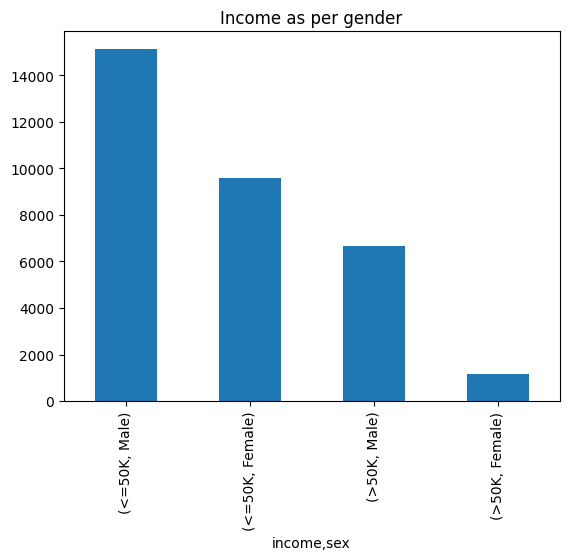

In [122]:
import matplotlib.pyplot as plt
df.groupby('income').sex.value_counts().plot.bar()
plt.title('Income as per gender')
plt.show()

Text(0.5, 1.0, 'Income less than 50,000')

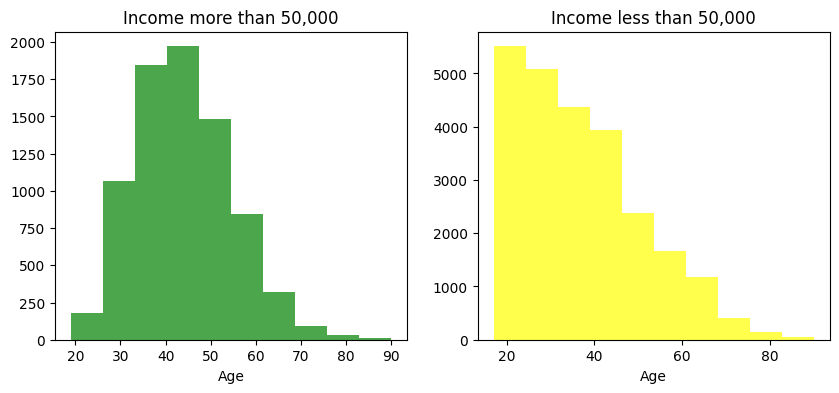

In [117]:
figure, axis = plt.subplots(1, 2, figsize=(10,4))

axis[0].hist(df[df['income'] == '>50K']['age'], bins=10,color='green', alpha=0.7)
axis[0].set_xlabel('Age')
axis[0].set_title('Income more than 50,000')

axis[1].hist(df[df['income'] == '<=50K']['age'], bins=10,color='yellow', alpha=0.7)
axis[1].set_xlabel('Age')
axis[1].set_title('Income less than 50,000')

In [123]:
df.groupby('income').occupation.value_counts()

income  occupation       
<=50K   Prof-specialty       3933
        Adm-clerical         3263
        Craft-repair         3170
        Other-service        3158
        Sales                2667
        Exec-managerial      2098
        Machine-op-inspct    1752
        Handlers-cleaners    1284
        Transport-moving     1277
        Farming-fishing       879
        Tech-support          645
        Protective-serv       438
        Priv-house-serv       148
        Armed-Forces            8
>50K    Prof-specialty       2050
        Exec-managerial      1968
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     250
        Protective-serv       211
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces            1
        Priv-house-serv         1
Name: occupation, dtyp

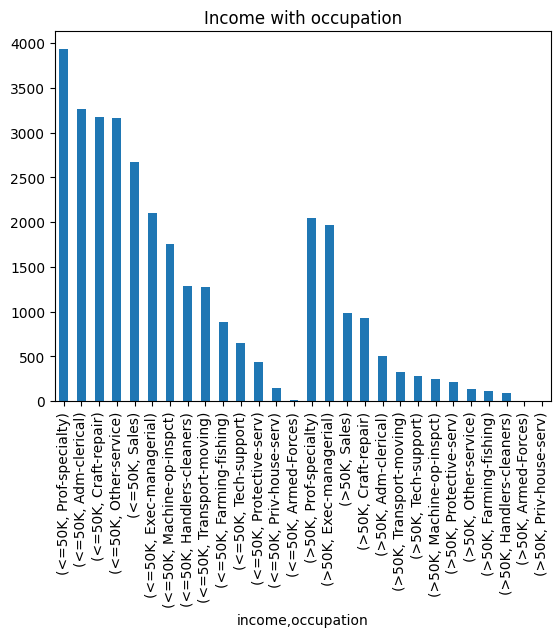

In [124]:
df.groupby('income').occupation.value_counts().plot.bar()
plt.title('Income with occupation')
plt.show()

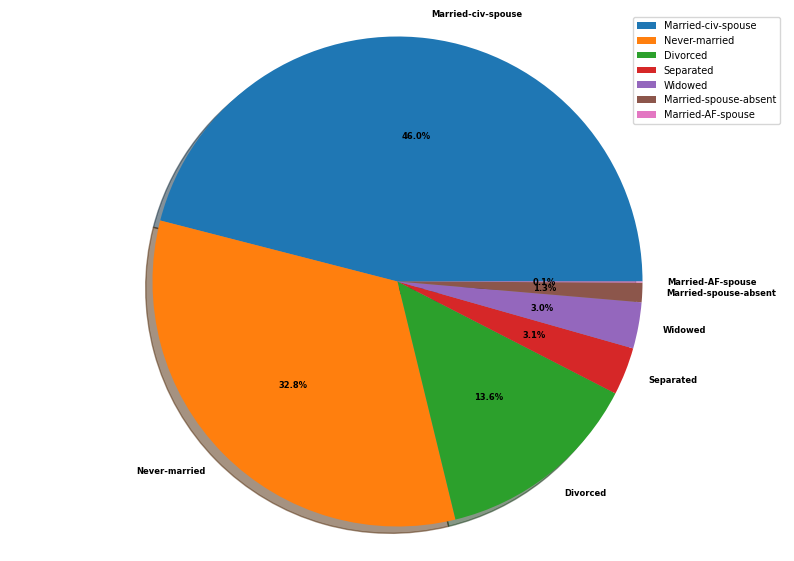

In [118]:
marial_status = df['marital.status'].value_counts()
plt.figure(figsize=(10, 7))

plt.style.use('default')
plt.pie(marial_status,labels=marial_status.index,autopct='%1.1f%%',shadow=True,textprops = {'fontsize': 6,'weight': 'bold'}
);
plt.legend(loc="center left")
plt.legend(prop={'size': 7})

plt.axis('equal')  ;

As the columns like marital.status,relationship etc. are not significant, we will drop it.

In [119]:
df.drop(['fnlwgt','marital.status','relationship','race'], axis = 1, inplace=True)
df.head()

,age,workclass,education,education.num,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Prof-specialty,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Exec-managerial,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,10,Prof-specialty,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Machine-op-inspct,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Prof-specialty,Female,0,3900,40,United-States,<=50K


<Axes: xlabel='income', ylabel='education.num'>

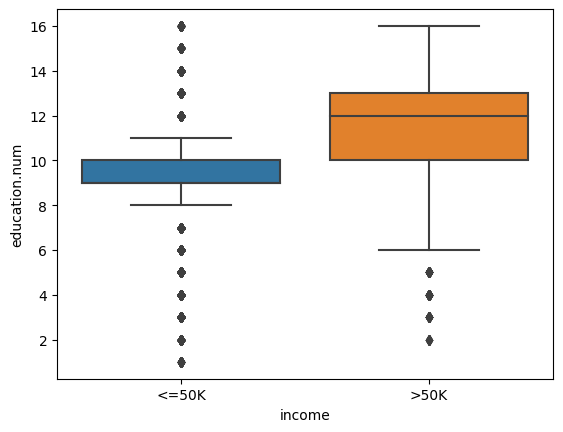

In [120]:
import seaborn as sns
sns.boxplot(data=df, y='education.num', x='income')

In [161]:
df['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [168]:
max_val= df['education.num'].quantile(0.985)
max_val

15.0

In [166]:
df[df['education.num']> max_val]

,age,workclass,education,education.num,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74,State-gov,Doctorate,16,Prof-specialty,Female,0,3683,20,United-States,>50K
10,45,Private,Doctorate,16,Prof-specialty,Female,0,3004,35,United-States,>50K
14,51,Private,Doctorate,16,Prof-specialty,Male,0,2824,40,United-States,>50K
35,63,Federal-gov,Doctorate,16,Exec-managerial,Female,0,2559,60,United-States,>50K
38,37,Self-emp-not-inc,Doctorate,16,Prof-specialty,Female,0,2559,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...
32443,51,Local-gov,Doctorate,16,Exec-managerial,Female,0,0,45,United-States,>50K
32476,58,Self-emp-inc,Doctorate,16,Prof-specialty,Female,0,0,99,United-States,<=50K
32477,50,Private,Doctorate,16,Prof-specialty,Female,0,0,50,United-States,<=50K
32535,34,Private,Doctorate,16,Prof-specialty,Male,0,0,60,United-States,>50K


<Axes: >

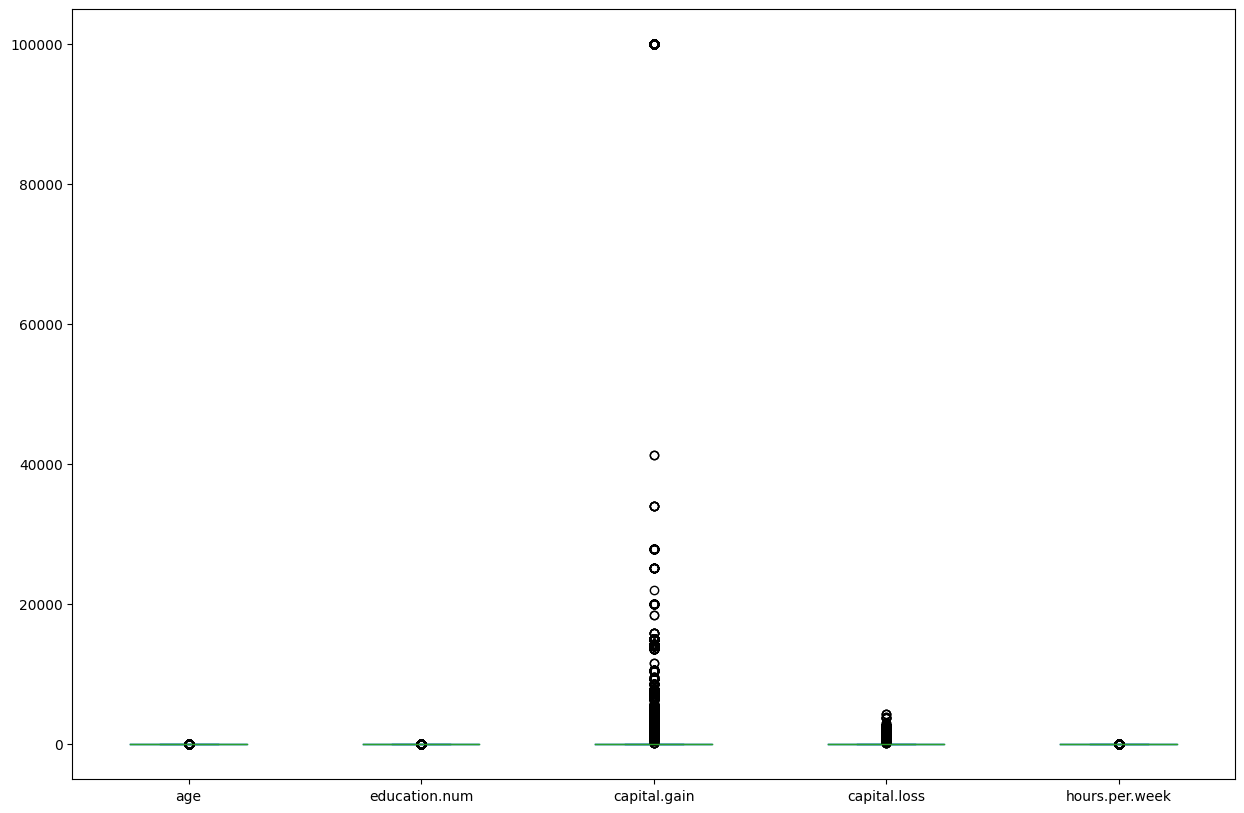

In [121]:
df.plot(kind='box', layout=(3,3), figsize=(15,10))

In [169]:
df['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

In [173]:
max_cap=df['capital.gain'].quantile(0.998)
max_cap

99999.0

In [193]:
df[df['capital.gain']==max_cap]

,age,workclass,education,education.num,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1519,54,Self-emp-inc,Prof-school,15,Prof-specialty,Male,99999,0,60,United-States,>50K
1520,52,Private,HS-grad,9,Exec-managerial,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,HS-grad,9,Sales,Male,99999,0,40,United-States,>50K
1522,52,Private,Bachelors,13,Exec-managerial,Male,99999,0,50,United-States,>50K
1523,46,Private,Prof-school,15,Prof-specialty,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...
1673,47,Private,Masters,14,Exec-managerial,Male,99999,0,55,United-States,>50K
1674,43,Self-emp-inc,Prof-school,15,Exec-managerial,Male,99999,0,40,United-States,>50K
1675,66,Private,Bachelors,13,Exec-managerial,Male,99999,0,55,United-States,>50K
1676,47,Private,Prof-school,15,Exec-managerial,Male,99999,0,40,United-States,>50K


In [194]:
df=df[df['capital.gain']!=max_val]

In [196]:
df['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

<Axes: >

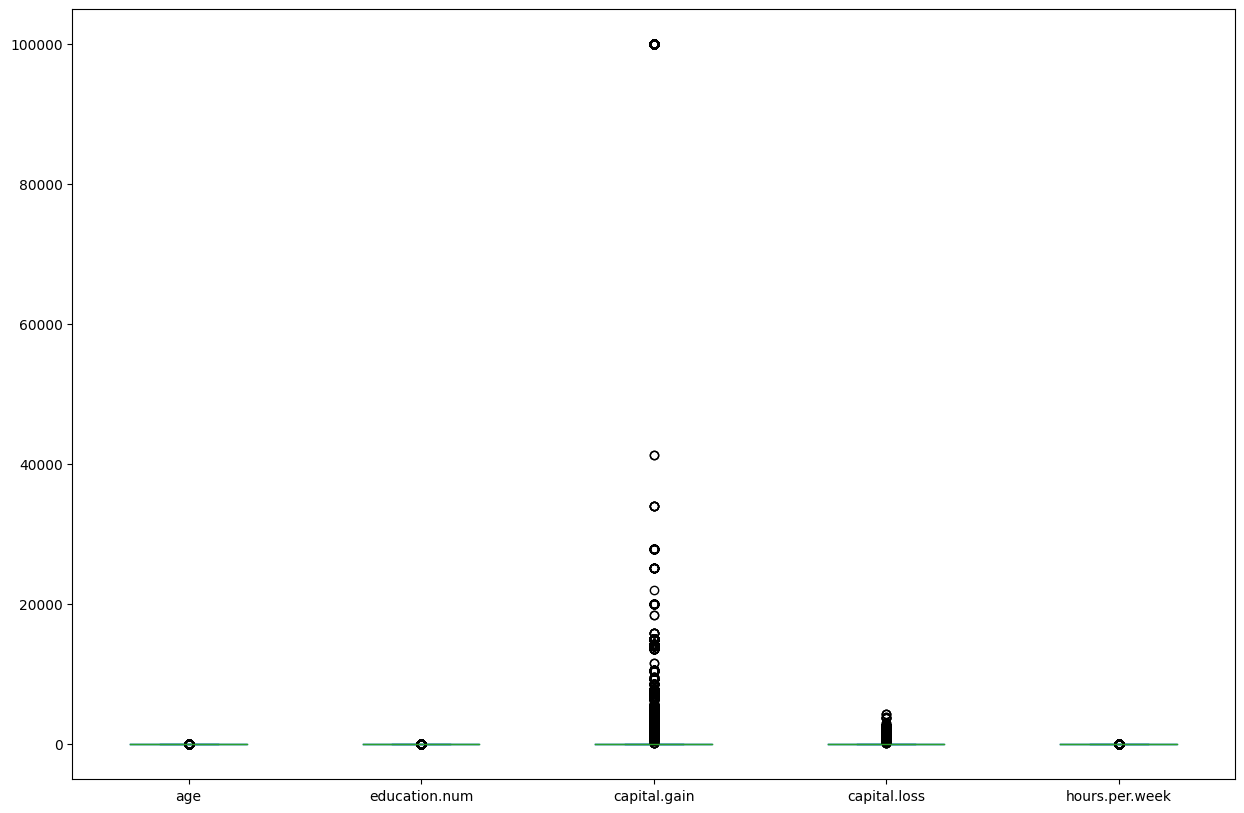

In [185]:
df.plot(kind='box', layout=(3,3), figsize=(15,10))

<ipython-input-125-828b6392ba0f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

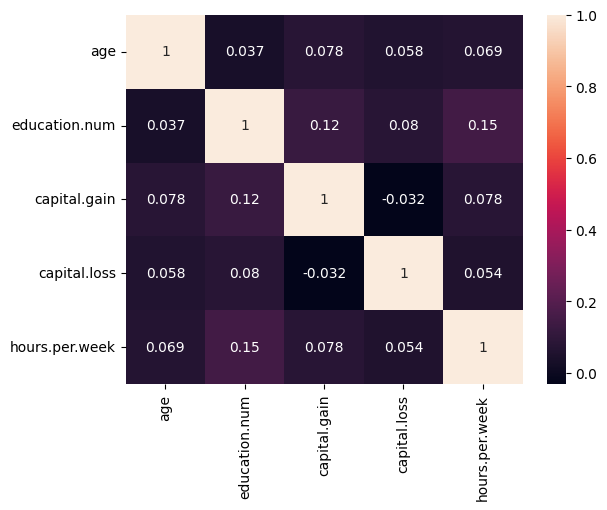

In [125]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [126]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [127]:
x_obj_col = x.select_dtypes(include='O').columns
x_obj_col

Index(['workclass', 'education', 'occupation', 'sex', 'native.country'], dtype='object')

# Feature engineering
# handle cantegorical features

In [128]:
from sklearn.preprocessing import LabelEncoder

x[x_obj_col] = x[x_obj_col].apply(LabelEncoder().fit_transform)
x.head()

,age,workclass,education,education.num,occupation,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,11,9,9,0,0,4356,40,38
1,82,3,11,9,3,0,0,4356,18,38
2,66,3,15,10,9,0,0,4356,40,38
3,54,3,5,4,6,0,0,3900,40,38
4,41,3,15,10,9,0,0,3900,40,38


In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=45)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

In [131]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} :- \t Accuracy = {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() :- 	 Accuracy = 0.80
GaussianNB() :- 	 Accuracy = 0.80
DecisionTreeClassifier() :- 	 Accuracy = 0.80
RandomForestClassifier() :- 	 Accuracy = 0.83
KNeighborsClassifier() :- 	 Accuracy = 0.83


In [132]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


In [133]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      6250
        >50K       0.66      0.54      0.59      1891

    accuracy                           0.83      8141
   macro avg       0.76      0.73      0.74      8141
weighted avg       0.82      0.83      0.82      8141



In [134]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5721,  529],
       [ 875, 1016]])

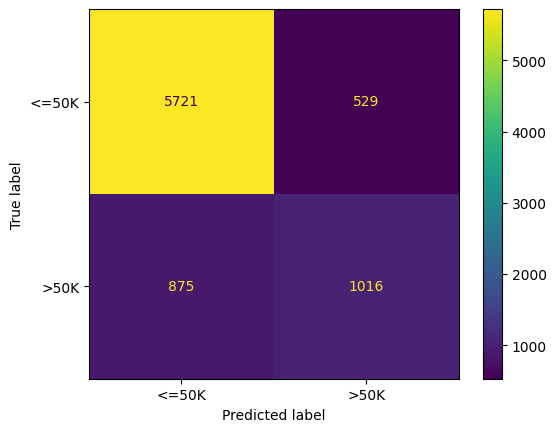

In [135]:
ConfusionMatrixDisplay(cm, display_labels=['<=50K', '>50K']).plot()